# YAY MODELS

## Model 1: Base Model with Attraction Scores

In [304]:
import pandas as pd
import numpy as np


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.dummy import DummyClassifier
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


plt.style.use('seaborn')

%matplotlib inline

In [509]:
df = pd.read_pickle('dummied.pkl')
print(df.shape)
df.head()

(8368, 305)


,iid,id,gender,idg,condtn,partner,pid,match,int_corr,samerace,...,career_c_8.5,career_c_9.0,career_c_10.0,career_c_11.0,career_c_12.0,career_c_13.0,career_c_14.0,career_c_15.0,career_c_16.0,career_c_17.0
0,1,1.0,0,1,1,1,11,0,0.14,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,2,12,0,0.54,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,3,13,1,0.16,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,4,14,1,0.61,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,5,15,1,0.21,0,...,0,0,0,0,0,0,0,0,0,0


### Base Features and Models
I want to have a base model with only attraction features to see how accurate these scores are

Note: Precision seeks to answer the question of how many of the selected items were correct.

#### print_confusion_matrix function

In [500]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="PuRd")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

#### Model time

In [510]:
features_2 = [c for c in df.columns if '_2' in c]
features_2 = features_2[:-17]

In [511]:
features = [c for c in df.columns if '_3' in c]
(features[:37])
features = features + features_2
drop = features[37:]

drop =  drop + ['match', 'career', 'dec_o', 'dec', 'you_call', 'they_cal', 'int_corr', 'iid', 'pid', 'idg', 'id']
# drop

In [512]:
# this is with all the features without any engineering or selection

X = df.drop(drop, axis =1, errors = 'ignore') # i am dropping career bc its not a numeric column :[
y = df.match

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 444)
X_train.shape

(5857, 250)

In [211]:
list(X.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'partner',
 'pid',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'imprace',
 'imprelig',
 'income',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'met',
 'match_es',
 'attr1_s',
 'sinc1_s',
 'intel1

In [102]:
# this is with just the attraction features

df_base = df[['match', 'attr', 'attr_o']].dropna()

X = df_base.drop('match', axis = 1)
y = df_base['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 444)

### Testing on the smaller dataset

#### Dummy Classifier

In [311]:
model_1 = DummyClassifier()
model_1.fit(X_train, y_train)
y_predict = model_1.predict(X_test)
model_1.score(X_test, y_test)

print(f'accuracy score: \t{accuracy_score(y_test, y_predict)}' )
print('recall score: ', '\t', recall_score(y_test, y_predict))
print('precision score: ', '\t', precision_score(y_test, y_predict))
print('f1 score: ', '\t', f1_score(y_test, y_predict))

accuracy score: 	0.49782923299565845
recall score:  	 0.494436381229
precision score:  	 0.496357455075
f1 score:  	 0.495395055744


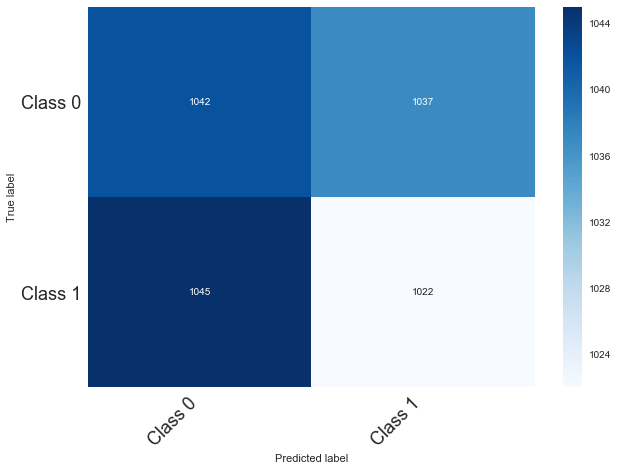

In [312]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

#### Logistic Regression 

In [9]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
y_predict = model_2.predict(X_test)
model_2.score(X_test, y_test)

print(f'accuracy score: \t{accuracy_score(y_test, y_predict)}' )
print('recall score: ', '\t', recall_score(y_test, y_predict))
print('precision score: ', '\t', precision_score(y_test, y_predict))
print('f1 score: ', '\t', f1_score(y_test, y_predict))

accuracy score: 	0.8383114297092792
recall score:  	 0.099537037037
precision score:  	 0.716666666667
f1 score:  	 0.174796747967


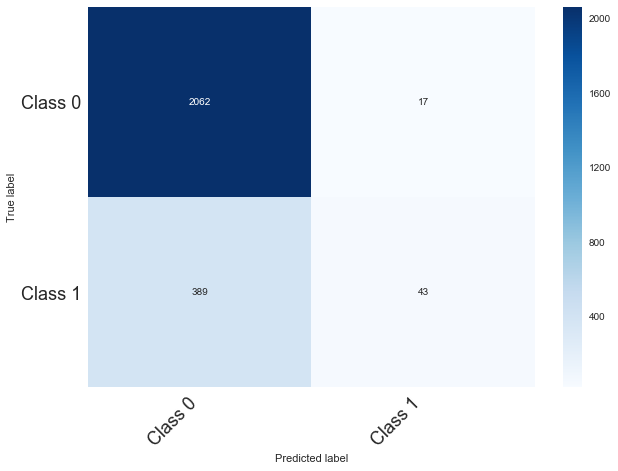

In [10]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

#### Decision Tree time

In [78]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(f'accuracy score: \t{accuracy_score(y_test, y_predict)}' )
print('recall score: ', '\t', recall_score(y_test, y_predict))
print('precision score: ', '\t', precision_score(y_test, y_predict))
print('f1 score: ', '\t', f1_score(y_test, y_predict))

ValueError: could not convert string to float: 'Business - Investment Management'

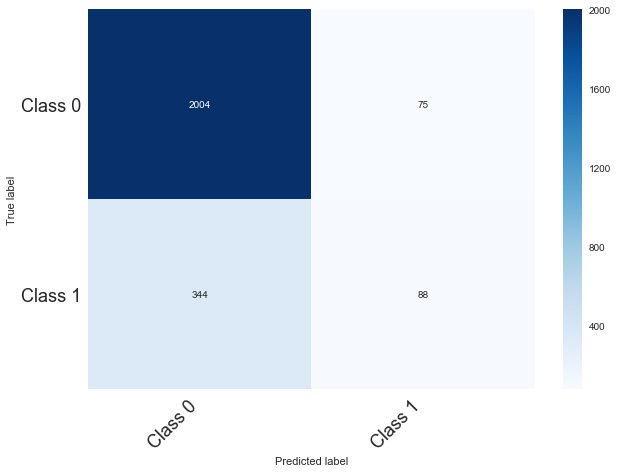

In [12]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

### Features I have available for the entire dataset

In [105]:
list(X.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'partner',
 'pid',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'imprace',
 'imprelig',
 'income',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'dec',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'met',
 'match_es',
 'attr1_s',
 '

In [187]:
ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled = ssX.transform(X_test)

In [136]:
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('decision tree', DecisionTreeClassifier),
          ('random forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    grid.fit(X_train_scaled, y_train)
    y_predict = grid.predict(X_test_scaled)
    s = f"\n{name}: best score: {grid.best_score_}"
    print(s)
    # cvs = np.mean(cross_val_score(grid, X_train_scaled, y_train, cv = 10, scoring= 'recall'))
    # print(f"this is the best indicator of how well the model is working {cvs}")
    print('recall score: ', '\t', recall_score(y_test, y_predict))
    # print(f'f1 score: {f1_score(y_test, y_predict)}')
    # I also want to get the recall score because that is the metric that i care about
    grids[name] = grid


knn: best score: 0.8615161857482676
recall score:  	 0.984096385542

logistic: best score: 1.0
recall score:  	 1.0

decision tree: best score: 1.0
recall score:  	 1.0

random forest: best score: 0.9665942703485365
recall score:  	 0.961927710843


In [176]:
#wow decision tree looks great
params = {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }

grid = GridSearchCV(DecisionTreeClassifier(), params)


#model = DecisionTreeClassifier(max_depth= [1,2,3,4,5], min_samples_leaf= [3,6,10])
grid.fit(X_train_scaled, y_train)
y_predict = grid.predict(X_test_scaled)

print("Accuracy: %.3f"% accuracy_score(y_test, grid.predict(X_test_scaled)))
print("Recall: %.3f"% recall_score(y_test, grid.predict(X_test_scaled)))
print(classification_report(y_test, grid.predict(X_test_scaled)))

grid.best_estimator_

Accuracy: 1.000
Recall: 1.000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2069
          1       1.00      1.00      1.00      2075

avg / total       1.00      1.00      1.00      4144



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [181]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)
feature_viewer = {}
for col, score in zip(X.columns, model.feature_importances_):
    feature_viewer[col] = score

    
#df = pd.DataFrame.from_dict(feature_viewer)

In [182]:
feature_viewer

{'age': 0.0,
 'age_o': 0.0,
 'amb': 0.0,
 'amb1_1': 0.0,
 'amb1_2': 0.0,
 'amb1_3': 0.0,
 'amb1_s': 0.0,
 'amb2_1': 0.0,
 'amb2_2': 0.0,
 'amb2_3': 0.0,
 'amb3_1': 0.0,
 'amb3_2': 0.0,
 'amb3_3': 0.0,
 'amb3_s': 0.0,
 'amb4_1': 0.0,
 'amb4_2': 0.0,
 'amb4_3': 0.0,
 'amb5_1': 0.0,
 'amb5_2': 0.0,
 'amb5_3': 0.0,
 'amb7_2': 0.0,
 'amb7_3': 0.0,
 'amb_o': 0.0,
 'art': 0.0,
 'attr': 0.0,
 'attr1_1': 0.0,
 'attr1_2': 0.0,
 'attr1_3': 0.0,
 'attr1_s': 0.0,
 'attr2_1': 0.0,
 'attr2_2': 0.0,
 'attr2_3': 0.0,
 'attr3_1': 0.0,
 'attr3_2': 0.0,
 'attr3_3': 0.0,
 'attr3_s': 0.0,
 'attr4_1': 0.0,
 'attr4_2': 0.0,
 'attr4_3': 0.0,
 'attr5_1': 0.0,
 'attr5_2': 0.0,
 'attr5_3': 0.0,
 'attr7_2': 0.0,
 'attr7_3': 0.0,
 'attr_o': 0.0,
 'career_c_1.0': 0.0,
 'career_c_10.0': 0.0,
 'career_c_11.0': 0.0,
 'career_c_12.0': 0.0,
 'career_c_13.0': 0.0,
 'career_c_14.0': 0.0,
 'career_c_15.0': 0.0,
 'career_c_16.0': 0.0,
 'career_c_17.0': 0.0,
 'career_c_2.0': 0.0,
 'career_c_3.0': 0.0,
 'career_c_4.0': 0.0,
 '

In [157]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)
feature_viewer = {}
for col, score in zip(X.columns, model.feature_importances_):
    feature_viewer[col] = score

    
df = pd.DataFrame.from_dict(feature_viewer)

ValueError: If using all scalar values, you must pass an index

In [172]:
df = pd.DataFrame.from_dict(feature_viewer, orient = 'index')
df = df.reset_index()
df.rename()

Index(['index', 0], dtype='object')

In [ ]:
for key, value in sorted(mydict.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

In [122]:
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from mlxtend.plotting import plot_decision_regions



In [123]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X,y)

In [247]:
ssX = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 444)


X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled = ssX.fit(X_test)




In [24]:
clf_ros = SVC().fit(X_resampled, y_resampled)
# clf_ros.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [127]:
# from imblearn.over_sampling import SMOTE
# X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X,y)

# ssX = StandardScaler()
# X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size = 0.3, random_state = 444)


# X_train_scaled = ssX.fit_transform(X_train)
# X_test_scaled = ssX.fit(X_test)
# clf_smote = SVC().fit(X_train_scaled, y_train)
# # X_test_scaled = pd.DataFrame(X_test_scaled)


In [128]:
# cm = print_confusion_matrix(confusion_matrix(y, clf_smote.predict(X_test_scaled)), ['Class 0', 'Class 1'])

TypeError: float() argument must be a string or a number, not 'StandardScaler'

In [131]:
# ssX = StandardScaler()
# X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size = 0.3, random_state = 444)


# X_train_scaled = ssX.fit_transform(X_train)
# X_test_scaled = ssX.fit(X_test)
#clf_smote = SVC().fit(X_train_scaled, y_train)
# X_test_scaled = pd.DataFrame(X_test_scaled)

# clf_adasyn = SVC().fit(X_train_scaled, y_train)


### Now you have to be smart and oversample to make this balanced

In [513]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size = 0.3, random_state = 444)


ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled = ssX.transform(X_test)

In [493]:
X_train_scaled

array([[ 1.02304011, -0.49040909, -1.55905046, ..., -0.0947187 ,
        -0.07548381, -0.03366821],
       [ 1.02304011, -0.49040909, -0.76331313, ..., -0.0947187 ,
        -0.07548381, -0.03366821],
       [-1.02387148, -0.49040909, -1.16777186, ..., -0.0947187 ,
        -0.07548381, -0.03366821],
       ..., 
       [ 1.02304011,  2.23515631, -1.55905046, ..., -0.0947187 ,
        -0.07548381, -0.03366821],
       [-1.02387148, -0.49040909,  0.08485298, ..., -0.0947187 ,
        -0.07548381, -0.03366821],
       [ 1.02304011, -0.49040909,  1.57117838, ..., -0.0947187 ,
        -0.07548381, -0.03366821]])

In [249]:
# clf_adasyn = SVC().fit(X_train_scaled, y_train)

# y_predict = clf_adasyn.predict(X_test_scaled)
# print(f'recall score: {recall_score(y_test, y_predict)}')

# print(f'f1 score: {f1_score(y_test, y_predict)}')

recall score: 0.9545234639574263
f1 score: 0.9252051582649473


In [508]:
# drawing graphs
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve


models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10), 
          DecisionTreeClassifier(max_depth=None), 
          # BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          SVC(probability=True), 
          LogisticRegression(C=81.113083078968728, penalty = 'l1'), 
          SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest", "Decision Tree",'SVC','Logistic','SGD-Log']

roc_plotting_stuff = []
for clf, name in zip(models, model_names):
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict_proba(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, preds[:,1])
    auc_score = auc(fpr, tpr)
    roc_plotting_stuff.append((name, tpr, fpr, auc_score))
    
    
plt.figure(dpi=150)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC Curves");

KeyboardInterrupt: 

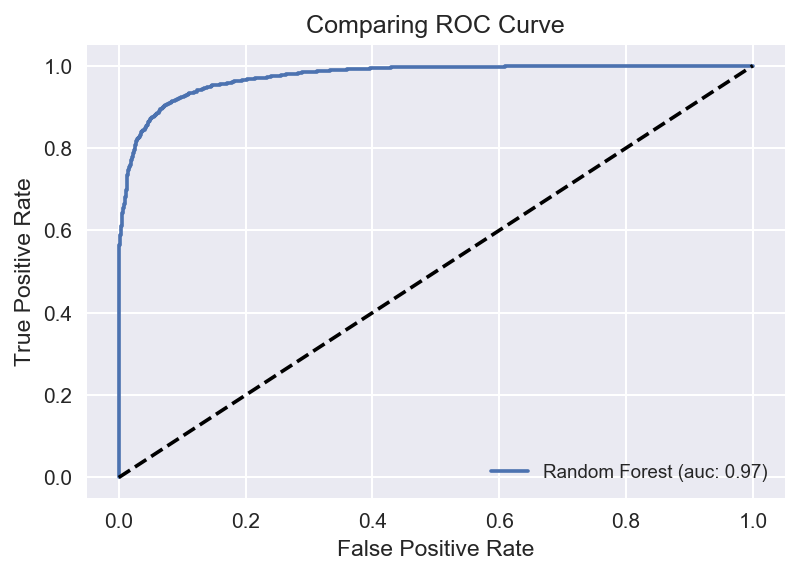

In [518]:
# drawing graphs
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve


models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)] 
          #DecisionTreeClassifier(max_depth=None), 
          # BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          #SVC(probability=True), 
          #LogisticRegression(C=81.113083078968728, penalty = 'l1'), 
          #SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest"]# "Decision Tree",'SVC','Logistic','SGD-Log']

roc_plotting_stuff = []
for clf, name in zip(models, model_names):
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict_proba(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, preds[:,1])
    auc_score = auc(fpr, tpr)
    roc_plotting_stuff.append((name, tpr, fpr, auc_score))
    
    
plt.figure(dpi=150)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC Curve");

In [324]:
names = ['KNN',
        'Logit',
        'Tree',
        "Forest",
        'SVM',
        'LinearSVM',
        'GaussianNB',
        'XGboost']

clfs = [(KNN(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (naive_bayes.GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    CVScores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='recall')
    print(f'{name} CV_recall is:', np.mean(CVScores))
    
# KNN > SVM > RandomTree 

KNN CV_recall is: 0.943967901626
Logit CV_recall is: 0.842397776721
Tree CV_recall is: 0.875558462379
Forest CV_recall is: 0.882262653489
SVM CV_recall is: 0.947115638708
LinearSVM CV_recall is: 0.844068319152
GaussianNB CV_recall is: 0.852460229375
XGboost CV_recall is: 0.894442242306


In [254]:
from sklearn.feature_selection import chi2, SelectKBest

# X_new = SelectKBest(chi2, k=10).fit_transform(X_train, y_train)

# X_new


array([[  8.        ,   8.        ,   8.        , ...,   2.        ,
          7.        ,   4.        ],
       [  5.43913491,   3.84129764,   7.        , ...,   8.12173018,
          7.        ,   7.43913491],
       [  5.        ,   6.        ,   6.        , ...,   7.        ,
          7.        ,   5.        ],
       ..., 
       [  8.        ,  10.        ,   8.        , ...,   5.        ,
          5.        ,   4.        ],
       [  7.        ,   5.77618239,   8.        , ...,   3.50717927,
          8.22381761,   6.89527046],
       [  4.        ,   3.        ,   4.        , ...,   5.        ,
          6.        ,   4.        ]])

In [189]:
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('decision tree', DecisionTreeClassifier),
          ('random forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    grid.fit(X_train_scaled, y_train)
    y_predict = grid.predict(X_test_scaled)
    s = f"\n{name}: best score: {grid.best_score_}"
    print(s)
    print('recall score: ', '\t', recall_score(y_test, y_predict))
    # I also want to get the recall score because that is the metric that i care about
    grids[name] = grid

KeyboardInterrupt: 

In [495]:
# this is going to be for random forest???????? imig

# #cool now that i know which model is performing the best, let me know try to find the best paramters of it below
params = {
        'n_estimators': [ 250, 300],
        'max_depth': [5, 7, 10],
        'min_samples_leaf': [3, 6, 10]
    }
grid = GridSearchCV(RandomForestClassifier(), param_grid = params)
grid.fit(X_train_scaled, y_train)
# y_predict = grid.predict(X_test_scaled)



# feature_viewer = {}
# for col, score in zip(X.columns, grid.feature_importances_):
#     feature_viewer[col] = score

# print("Accuracy: %.3f"% accuracy_score(y_test, grid.predict(X_test_scaled)))
# print("Recall: %.3f"% recall_score(y_test, grid.predict(X_test_scaled)))
# print(classification_report(y_test, grid.predict(X_test_scaled)))
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

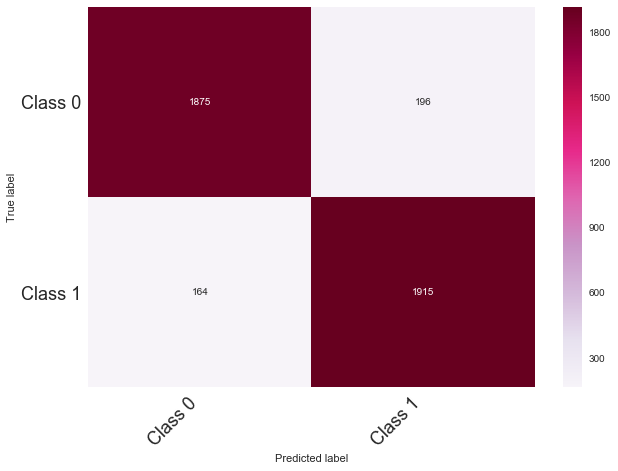

In [502]:
# grid.fit(X_train_scaled, y_train)
y_predict = grid.predict(X_test_scaled)

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [496]:
print(classification_report(y_test, grid.predict(X_test_scaled)))

             precision    recall  f1-score   support

          0       0.92      0.91      0.91      2071
          1       0.91      0.92      0.91      2079

avg / total       0.91      0.91      0.91      4150



In [497]:
print_confusion_matrix(y_test, grid.predict(X_test_scaled))['Class 0', 'Class 1']

ValueError: Shape of passed values is (1, 4150), indices imply (4150, 4150)

In [481]:
params = grid.best_params_
params

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [514]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('random', RandomForestClassifier(**params))])


pipeline.fit(X_train_scaled,y_train)
print(classification_report(y_test, pipeline.predict(X_test_scaled)))

ValueError: n_estimators must be an integer, got <class 'list'>.

In [515]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.023040,-0.490409,-1.559050,1.305231,-0.696661,-0.629618,-0.671019,-0.476727,0.181643,0.670465,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
1,1.023040,-0.490409,-0.763313,0.608276,2.245364,-0.065951,-0.476232,0.400707,1.290178,-1.047115,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
2,-1.023871,-0.490409,-1.167772,-0.858520,-1.636658,-0.629618,0.227987,-1.135955,0.764391,-2.253552,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
3,0.653293,1.742819,-0.118896,-0.858520,0.530404,0.646172,4.698559,-2.004434,-2.459256,-2.208800,...,-0.036703,-0.266930,-0.211880,1.017939,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
4,1.023040,-0.490409,-0.972133,1.305231,-0.696661,-0.629618,-0.916966,0.121034,0.393848,0.092069,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
5,-1.023871,-0.490409,-0.876974,-0.858520,0.400854,-0.629618,-0.343021,0.670828,0.026544,0.274807,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
6,-1.023871,-0.490409,1.571178,1.305231,1.183332,-0.629618,0.227987,0.400707,-0.051782,0.415971,...,-0.036703,4.010865,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
7,1.023040,-0.490409,0.016147,0.622089,-0.267848,1.074099,-0.478912,0.360111,-1.125639,-0.145912,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
8,1.023040,-0.490409,-0.972133,-0.858520,1.183332,2.870277,-0.191717,0.400707,-0.051782,0.415971,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668
9,1.023040,-0.490409,-1.559050,-0.858520,0.556668,0.245356,-1.870533,1.169038,0.764391,1.305812,...,-0.036703,-0.266930,-0.211880,-0.164653,-0.051041,-0.092214,-0.042551,-0.094719,-0.075484,-0.033668


In [490]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('random', RandomForestClassifier(**params))])


pipeline.fit(X_adasyn,y_adasyn)

ValueError: n_estimators must be an integer, got <class 'list'>.

In [474]:
print(classification_report(y_test, grid.predict(X_test_scaled)))

ValueError: Number of features of the model must match the input. Model n_features is 250 and input n_features is 12 

In [467]:
##random_forest

import pickle

pickle.dump(pipeline, open('rf_model.pkl', 'wb'))

In [486]:
# this is with all the features without any engineering or selection

X = df.drop(drop, axis =1, errors = 'ignore') # i am dropping career bc its not a numeric column :[
y = df.match

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 444)
X_train.shape

(5857, 250)

In [487]:
features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
X_subset = X[features]

from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_subset,y)

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size = 0.3, random_state = 444)


ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled = ssX.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_subset.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_subset.columns)


# list(X.columns)

In [378]:
# this is for logistic regression?


# #cool now that i know which model is performing the best, let me know try to find the best paramters of it below
params = {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    }
grid = GridSearchCV(LogisticRegression(), param_grid = params)
grid.fit(X_train_scaled, y_train)
# y_predict = grid.predict(X_test_scaled)



# feature_viewer = {}
# for col, score in zip(X.columns, grid.feature_importances_):
#     feature_viewer[col] = score

# print("Accuracy: %.3f"% accuracy_score(y_test, grid.predict(X_test_scaled)))
# print("Recall: %.3f"% recall_score(y_test, grid.predict(X_test_scaled)))
# print(classification_report(y_test, grid.predict(X_test_scaled)))
grid.best_estimator_

LogisticRegression(C=81.113083078968728, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [384]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.73511689563750304

In [379]:
estimators = grid.best_estimator_
params = grid.best_params_
params

{'C': 81.113083078968728, 'penalty': 'l1'}

In [420]:
y_predict = grid.predict(X_train_scaled)
recall_score(y_train, y_predict)

0.75545759865659112

In [425]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('logistic', LogisticRegression(C = 81.113083078968728, penalty = 'l1'))])


pipeline.fit(X_adasyn,y_adasyn)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=81.11308307896873, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [488]:
y_predict = pipeline.predict(X_adasyn)
recall_score(y_adasyn, y_predict)

ValueError: operands could not be broadcast together with shapes (13830,12) (250,) (13830,12) 

In [ ]:
print_confusion_matrix()

In [446]:
import pickle

pickle.dump(pipeline, open('model.pkl', 'wb'))

In [428]:
list(X_subset.columns)

['attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o']

In [447]:
X_subset.head(10)


,attr,sinc,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,6.0,9.0,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,5.0,8.0,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7.0,6.0,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,5.0,6.0,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
5,4.0,9.0,7.0,4.0,6.0,4.0,7.0,7.0,8.0,8.0,7.0,7.0
6,7.0,6.0,7.0,4.0,6.0,7.0,3.0,6.0,7.0,5.0,8.0,7.0
7,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0,5.0,6.0,8.0,6.0
8,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0
9,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0,6.0,6.0,6.0,6.0


In [468]:
example = {
  'attr': 6,  # 
  'sinc': 9,    # 
  'intel': 7,    # 
  'fun': 7,  # 
  'amb': 6,  # 
  'shar': 5,
    'attr_o': 6,
    'sinc_o': 8,    # M or F
  'intel_o': 8,    # int
  'fun_o': 8,  # int
  'amb_o': 8,  # int
  'shar_o': 6# float
}

def make_prediction(features):
    X = np.array([features['attr'], (features['sinc']), features['intel'], 
                  features['fun'], features['amb'], features['shar'], features['attr_o'],
                 features['sinc_o'], features['intel_o'],features['fun_o'], features['amb_o'], 
                 features['shar_o']]).reshape(1,-1)
    prob_survived = pipeline.predict_proba(X)[0, 1]
    
    result = {
        'prediction': int(prob_survived > 0.5),
        'prob_matched': prob_survived
    }
    return result

In [469]:
make_prediction(example)

/Users/jennwon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


{'prediction': 0, 'prob_matched': 0.49089609085532837}

In [498]:
pipeline.fit(X_train_scaled, y_train)
y_predict = pipeline.predict(X_test_scaled)

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

ValueError: n_estimators must be an integer, got <class 'list'>.

In [470]:
pipeline.predict_proba(X_subset.iloc[:10])

array([[ 0.50910391,  0.49089609],
       [ 0.37205567,  0.62794433],
       [ 0.36753043,  0.63246957],
       [ 0.23853505,  0.76146495],
       [ 0.57272749,  0.42727251],
       [ 0.82763675,  0.17236325],
       [ 0.79750828,  0.20249172],
       [ 0.81164911,  0.18835089],
       [ 0.23325729,  0.76674271],
       [ 0.64717309,  0.35282691]])

In [471]:
y[:10]

0    0
1    0
2    1
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: match, dtype: int64

In [442]:
from sklearn.metrics import roc_auc_score

probs = pipeline.predict_proba(X_subset)[:,1]
roc_auc_score(y, probs)

0.83009144039886185

In [435]:
make_prediction([ row for row in X_subset.iloc[:5,:].values])

TypeError: list indices must be integers or slices, not str

In [326]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('logistic', LogisticRegression(params))])


pipeline.fit(X,y)




model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)
feature_viewer = {}
for col, score in zip(X.columns, model.feature_importances_):
    feature_viewer[col] = score


print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test_scaled)))
print("Recall: %.3f"% recall_score(y_test, model.predict(X_test_scaled)))
print(classification_report(y_test, model.predict(X_test_scaled))) 

Accuracy: 0.864
Recall: 0.882
             precision    recall  f1-score   support

          0       0.88      0.85      0.86      2071
          1       0.85      0.88      0.87      2079

avg / total       0.86      0.86      0.86      4150



In [381]:
model = LogisticRegression(C=81.113083078968728, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)
feature_viewer = {}
for name, coef in sorted(zip(X.columns, model.coef_[0]), key=lambda x: abs(x[1]), reverse=True)[:15]:
  print(f'{name}: {coef:8.6f}')


print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test_scaled)))
print("Recall: %.3f"% recall_score(y_test, model.predict(X_test_scaled)))
print(classification_report(y_test, model.predict(X_test_scaled))) 
#df = pd.DataFrame.from_dict(feature_viewer)

pf_o_att: 0.520182
gender: 0.508589
pf_o_fun: 0.440914
samerace: 0.438443
pf_o_sha: 0.307148
race_o: 0.279966
pf_o_amb: -0.252101
age_o: -0.220626
partner: 0.090259
condtn: -0.055133
pf_o_int: 0.043640
pf_o_sin: -0.020832
Accuracy: 0.735
Recall: 0.765
             precision    recall  f1-score   support

          0       0.75      0.71      0.73      2071
          1       0.72      0.76      0.74      2078

avg / total       0.74      0.74      0.73      4149



In [361]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('logistic', LogisticRegression(params))])


pipeline.fit(X,y)

TypeError: unhashable type: 'dict'

In [330]:
import pickle

pickle.dump(pipeline, open('model.pkl', 'wb'))

In [291]:
df = pd.DataFrame.from_dict(feature_viewer, orient = 'index')
df = df.reset_index()
#df
df.rename(columns = {'index' : 'feature', 0: 'importance'}, inplace = True)
df_new = df.loc[df.importance > 0.06]
df_new

,feature,importance
16,attr_o,0.084452
19,fun_o,0.077240
22,like_o,0.114835
76,attr,0.060548
79,fun,0.073062
82,like,0.100665


In [348]:
lr = LogisticRegression(params)
lr.fit(X_train_scaled,y_train)
lr.coef_



TypeError: unhashable type: 'dict'

In [337]:
lr.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [345]:
for name, coef in sorted(zip(X.columns, lr.coef_[0]), key=lambda x: abs(x[1]), reverse=True)[:15]:
  print(f'{name}: {coef:8.6f}')

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [333]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_train_scaled_subset = X_train_scaled[features]

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)
X_test_scaled_subset = X_test_scaled[features]

KeyError: "['wave__3' 'positions__3' 'race__3.0' 'order__3' 'field_3.0' 'goal_3.0'\n 'date_3.0' 'go_out_3.0' 'career_c_3.0' 'satis_2' 'numdat_2' 'attr7_2'\n 'sinc7_2' 'intel7_2' 'fun7_2' 'amb7_2' 'shar7_2' 'attr1_2' 'sinc1_2'\n 'intel1_2' 'fun1_2' 'amb1_2' 'shar1_2' 'attr4_2' 'sinc4_2' 'intel4_2'\n 'fun4_2' 'amb4_2' 'shar4_2' 'attr2_2' 'sinc2_2' 'intel2_2' 'fun2_2'\n 'amb2_2' 'shar2_2' 'attr3_2' 'sinc3_2' 'intel3_2' 'fun3_2' 'amb3_2'\n 'attr5_2' 'sinc5_2' 'intel5_2' 'fun5_2' 'amb5_2'] not in index"

In [280]:
features = list(df_new.feature)
#X_train_scaled = X_train_scaled[[features]]


model_1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

model_1.fit(X_train_scaled_subset, y_train)
model_1.score(X_test_scaled_subset, y_test)
feature_viewer = {}
for col, score in zip(X.columns, model.feature_importances_):
    feature_viewer[col] = score


print("Accuracy: %.3f"% accuracy_score(y_test, model_1.predict(X_test_scaled_subset)))
print("Recall: %.3f"% recall_score(y_test, model_1.predict(X_test_scaled_subset)))
print(classification_report(y_test, model_1.predict(X_test_scaled_subset))) 
#df = pd.DataFrame.from_dict(feature_viewer)

Accuracy: 0.866
Recall: 0.888
             precision    recall  f1-score   support

          0       0.88      0.84      0.86      2079
          1       0.85      0.89      0.87      2067

avg / total       0.87      0.87      0.87      4146



In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('RandomForest', RandomForest(**grids['logistic'].best_params_))])

# Do the impuation step
#X.Age.fillna(X.groupby(['Sex', 'Pclass']).Age.transform(np.median), inplace=True)

# pipeline.fit(X,y)

In [ ]:
# example of making a prediction

# example = {
#   'Pclass': 3,  # int
#   'Sex': 'M',    # M or F
#   'Age': 22,    # int
#   'SibSp': 1,  # int
#   'Parch': 0,  # int
#   'Fare': 7.25    # float
# }

# def make_prediction(features):
#     X = np.array([features['Pclass'], int(features['Sex'] == 'M'), features['Age'], 
#                   features['SibSp'], features['Parch'], features['Fare']]).reshape(1,-1)
#     prob_survived = pipeline.predict_proba(X)[0, 1]
    
#     result = {
#         'prediction': int(prob_survived > 0.5),
#         'prob_survived': prob_survived
#     }
#     return result

In [55]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

model = naive_bayes.GaussianNB()
model.fit(X_train_scaled, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test_scaled)))
print("Recall: %.3f"% recall_score(y_test, model.predict(X_test_scaled)))
print(classification_report(y_test, model.predict(X_test_scaled)))

Accuracy: 0.683
Recall: 0.770
             precision    recall  f1-score   support

          0       0.72      0.59      0.65      2061
          1       0.66      0.77      0.71      2096

avg / total       0.69      0.68      0.68      4157



In [290]:
list(df.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'imprace',
 'imprelig',
 'income',
 'career',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'dec',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'met',
 'matc

In [54]:
model = naive_bayes.BernoulliNB()
model.fit(X_train_scaled, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test_scaled)))
print("Recall: %.3f"% recall_score(y_test, model.predict(X_test_scaled)))
print(classification_report(y_test, model.predict(X_test_scaled)))


Accuracy: 0.630
Recall: 0.420
             precision    recall  f1-score   support

          0       0.59      0.84      0.69      2061
          1       0.73      0.42      0.53      2096

avg / total       0.66      0.63      0.61      4157



In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_centered_projected = pca.fit_transform(X_train_scaled)


In [74]:
data = pd.DataFrame(X_centered_projected)
data

,0,1
0,0.763748,-1.145030
1,-1.164229,0.782947
2,-0.007443,-0.373839
3,-0.007443,-0.373839
4,0.375386,0.008990
5,-0.775867,-0.371073
6,-0.395805,0.780181
7,0.375386,0.008990
8,-0.390272,-0.756668
9,2.297830,-0.382138


In [61]:
pca.mean_

array([  4.28770262e-18,   8.62349162e-17])

In [62]:
pca.explained_variance_ratio_

array([ 0.50208373,  0.49791627])

In [63]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])